<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-10-03 11:24:29--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-03 11:24:29--  https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-03 11:24:30--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## 21-1

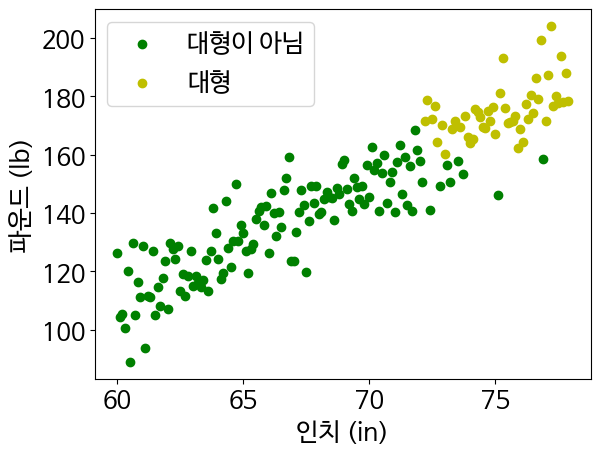

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
def plot_customers(X, y, xlabel='인치 (in)', ylabel='파운드 (lb)'):
    colors = ['g', 'y']
    labels = ['대형이 아님', '대형']
    for i, (color, label) in enumerate(zip(colors, labels)):
        plt.scatter(X[:,0][y == i], X[:,1][y == i], color=color, label=label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

inches = np.arange(60, 78, 0.1)
random_fluctuations = np.random.normal(scale=10, size=inches.size)
pounds = 4 * inches - 130 + random_fluctuations
X = np.array([inches, pounds]).T
y = ((X[:,0] > 72) & (X[:,1] > 160)).astype(int)

plot_customers(X, y)
plt.legend()
plt.show()

## 21-2

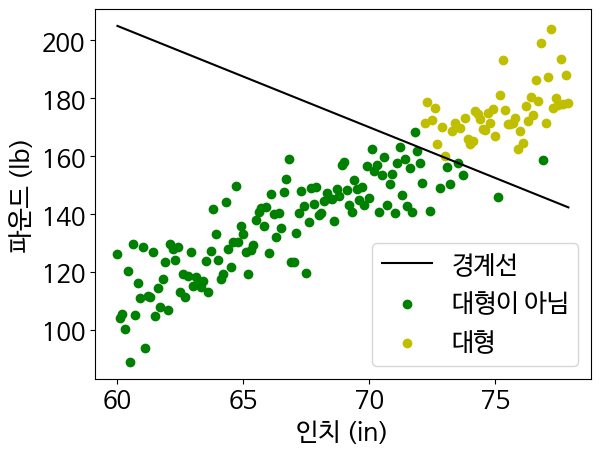

In [ ]:
def boundary(inches): return -3.5 * inches + 415
plt.plot(X[:,0], boundary(X[:,0]), color='k', label='경계선')
plot_customers(X, y)
plt.legend()
plt.show()

## 21-3

In [ ]:
from sklearn.metrics import f1_score
y_pred = []
for inches, lbs in X:
    prediction = int(lbs > -3.5 * inches + 415)
    y_pred.append(prediction)

f_measure = f1_score(y_pred, y)
print(f'f-츨정치는 {f_measure:.2f} 입니다')

f-츨정치는 0.97 입니다


## 21-4

In [ ]:
weights = np.array([3.5, 1, -415])
predictions = [int(weights @ [inches, lbs, 1] > 0) for inches, lbs in X]
assert predictions == y_pred

## 21-5

In [ ]:
M = np.column_stack([X, np.ones(X.shape[0])])
print("패딩이 적용된 특징 행렬의 처음 다섯 행은 다음과 같습니다")
print(np.round(M[:5], 2))

predictions = (M @ weights > 0).astype(int)
assert predictions.tolist() == y_pred

패딩이 적용된 특징 행렬의 처음 다섯 행은 다음과 같습니다
[[ 60.   126.24   1.  ]
 [ 60.1  104.28   1.  ]
 [ 60.2  105.52   1.  ]
 [ 60.3  100.47   1.  ]
 [ 60.4  120.25   1.  ]]


## 21-6

In [ ]:
def linear_classifier(X, weights):
    M = np.column_stack([X, np.ones(X.shape[0])])
    return (M @ weights > 0).astype(int)

predictions = linear_classifier(X, weights)
assert predictions.tolist() == y_pred

## 21-7

In [ ]:
np.random.seed(0)
weights = np.random.normal(size=3)
y_pred = linear_classifier(X, weights)
f_measure = f1_score(y_pred, y)

print('아래의 임의의 가중치를 입력했습니다')
print(np.round(weights, 2))
print(f'\nf-측정치는 {f_measure:.2f}와 같습니다')

아래의 임의의 가중치를 입력했습니다
[1.76 0.4  0.98]

f-측정치는 0.43와 같습니다


## 21-8

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 21-9

In [ ]:
assert np.all(linear_classifier(X, [0, 0, 0]) == 0)

## 21-10

In [ ]:
def get_bias_shift(predicted, actual):
    if predicted == actual:
        return 0
    if predicted > actual:
        return 1

    return -1

## 21-11

In [ ]:
for predicted, actual in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    bias_shift = get_bias_shift(predicted, actual)
    assert bias_shift == predicted - actual


## 21-12

In [ ]:
def get_bias_shift(predicted, actual, learning_rate=0.1):
    return learning_rate * (predicted - actual)

## 21-13

In [ ]:
def predict(v, weights): return int(v @ weights > 0)

starting_bias = weights[-1]
for i, actual in enumerate(y):
    predicted = predict(M[i], weights)
    bias_shift = get_bias_shift(predicted, actual)
    weights[-1] -= bias_shift

new_bias = weights[-1]
print(f"초기 편향은 {starting_bias:.2f} 이었습니다")
print(f"조정된 편향은 {new_bias:.2f}와 같습니다")

초기 편향은 0.98 이었습니다
조정된 편향은 -12.02와 같습니다


## 21-14

In [ ]:
y_pred = linear_classifier(X, weights)
f_measure = f1_score(y_pred, y)
print(f'f-측정치는 {f_measure:.2f}와 같습니다')

f-측정치는 0.43와 같습니다


## 21-15

In [ ]:
old_weights = weights.copy()
for i, actual in enumerate(y):
    predicted = predict(M[i], weights)
    bias_shift = get_bias_shift(predicted, actual)
    weights -= bias_shift * M[i]

y_pred = linear_classifier(X, weights)
f_measure = f1_score(y_pred, y)

print("이전의 가중치는 다음과 같습니다")
print(np.round(old_weights, 2))
print("\n갱신된 가중치는 다음과 같습니다")
print(np.round(weights, 2))
print(f'\nf-측정치는 {f_measure:.2f}와 같습니다')

이전의 가중치는 다음과 같습니다
[  1.76   0.4  -12.02]

갱신된 가중치는 다음과 같습니다
[ -4.64   2.22 -12.12]

f-측정치는 0.78와 같습니다


## 21-16

[0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.4347826086

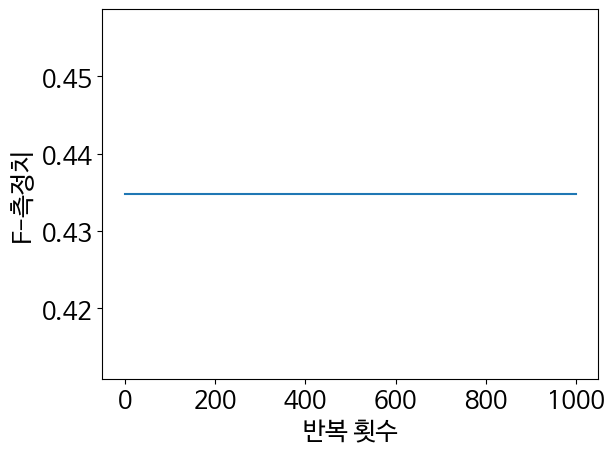

In [ ]:
np.random.seed(0)
weights = np.random.normal(size=3)

f_measures = []
for _ in range(1000):
    y_pred = linear_classifier(X, weights)
    f_measures.append(f1_score(y_pred, y))

for i, actual in enumerate(y):
    predicted = predict(M[i], weights)
    bias_shift = get_bias_shift(predicted, actual)
    weights -= bias_shift * M[i]

print(f_measures)
print(f'1000번 반복 이후의 f-측정치는 {f_measures[-1]:.2f}와 같습니다')
plt.plot(range(len(f_measures)), f_measures)
plt.xlabel('반복 횟수')
plt.ylabel('F-측정치')
plt.show()

## 21-7

1000번 반복 후의 f-측정치는 0.82와 같습니다


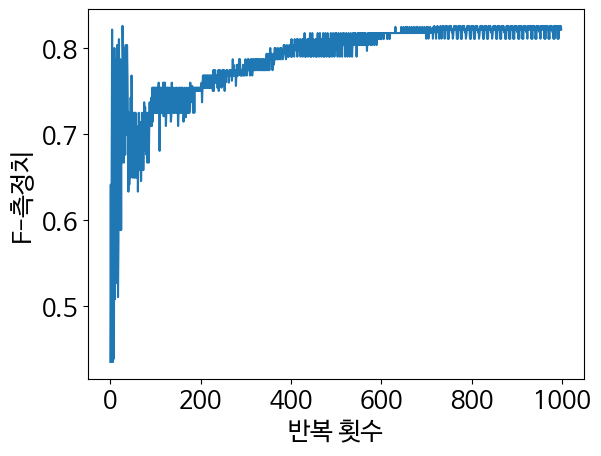

In [ ]:
np.random.seed(0)
def train(X, y, predict=predict):
    M = np.column_stack([X, np.ones(X.shape[0])])
    weights = np.random.normal(size=X.shape[1] + 1)
    f_measures = []
    for k in range(1, 1000):
        y_pred = linear_classifier(X, weights)
        f_measures.append(f1_score(y_pred, y))

        for i, actual in enumerate(y):
            predicted = predict(M[i], weights)
            bias_shift = get_bias_shift(predicted, actual)
            weights -= bias_shift * M[i] / k

    return weights, f_measures

weights, f_measures = train(X, y)
print(f'1000번 반복 후의 f-측정치는 {f_measures[-1]:.2f}와 같습니다')
plt.plot(range(len(f_measures)), f_measures)
plt.xlabel('반복 횟수')
plt.ylabel('F-측정치')
plt.show()

## 21-18

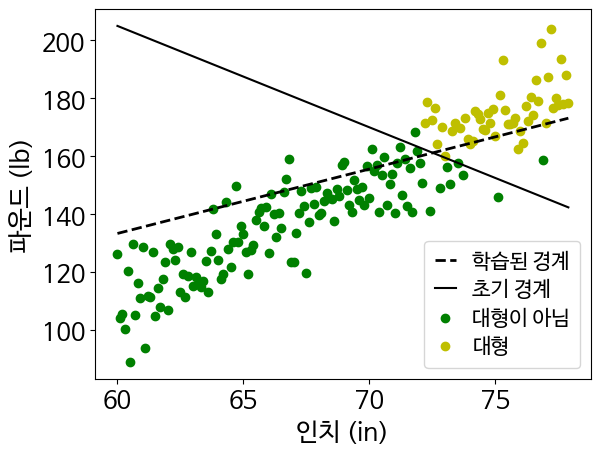

In [ ]:
inches_coef, lbs_coef, bias = weights
def new_boundary(inches):
    return -(inches_coef * inches + bias) / lbs_coef

plt.plot(X[:,0], new_boundary(X[:,0]), color='k', linestyle='--',
                          label='학습된 경계', linewidth=2)
plt.plot(X[:,0], boundary(X[:,0]), color='k', label='초기 경계')
plot_customers(X, y)
plt.legend(loc='lower right',
           fontsize='small',
           handlelength=1,
           borderpad=0.5,
           labelspacing=0.3)
plt.show()


## 21-19

In [ ]:
means = X.mean(axis=0)
stds = X.std(axis=0)
print(f"평균 값: {np.round(means, 2)}")
print(f"STD 값: {np.round(stds, 2)}")

평균 값: [ 68.95 146.56]
STD 값: [ 5.2  23.26]


## 21-20

In [ ]:
def standardize(X):
    return (X - means) / stds

X_s = standardize(X)
assert np.allclose(X_s.mean(axis=0), 0)
assert np.allclose(X_s.std(axis=0), 1)

## 21-21

표준화 후 f-측정치는 0.98와 같습니다


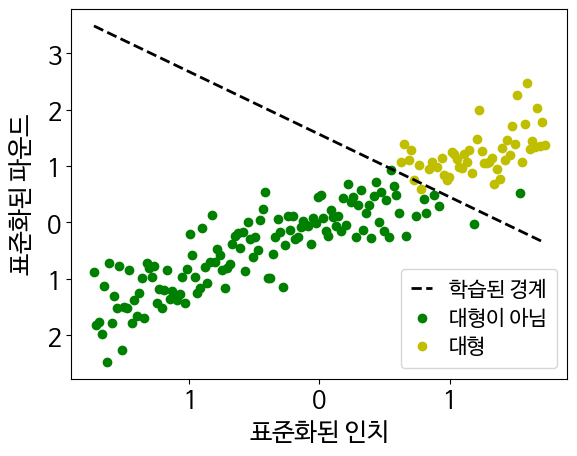

In [ ]:
np.random.seed(0)
weights, f_measures = train(X_s, y)
print(f'표준화 후 f-측정치는 {f_measures[-1]:.2f}와 같습니다')

def plot_boundary(weights):
    a, b, c = weights
    new_boundary = lambda x: -(a * x + c) / b
    plt.plot(X_s[:,0], new_boundary(X_s[:,0]), color='k', linestyle='--',
                                label='학습된 경계', linewidth=2)
    plot_customers(X_s, y, xlabel='표준화된 인치', ylabel='표준화된 파운드')
    plt.legend(loc='lower right',
           fontsize='small',
           handlelength=1,
           borderpad=0.5,
           labelspacing=0.3)
    plt.show()

plot_boundary(weights)

## 21-22

In [ ]:
new_data = np.array([[63, 110], [76, 199]])
predictions = linear_classifier(standardize(new_data), weights)
print(predictions)

[0 1]


## 21-23

In [ ]:
np.random.seed(0)
poor_train_count = sum([train(X_s, y)[1][-1] < 0.97 for _ in range(5)])
print("기준 값인 0.97 이하인 f-측정치를 보인 경우는 "
     f"총 5회의 반복 학습 중 {poor_train_count}번 나타났습니다")

기준 값인 0.97 이하인 f-측정치를 보인 경우는 총 5회의 반복 학습 중 4번 나타났습니다


## 21-24

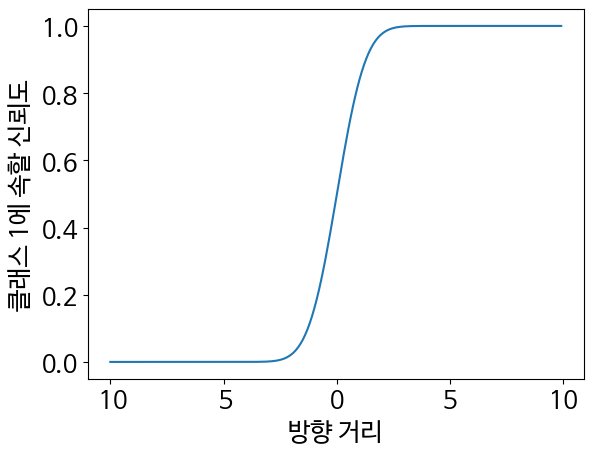

In [ ]:
from scipy import stats
z = np.arange(-10, 10, 0.1)
assert stats.norm.cdf(0.0) == 0.5
plt.plot(z, stats.norm.cdf(z))
plt.xlabel('방향 거리')
plt.ylabel('클래스 1에 속할 신뢰도')
plt.show()

## 21-25

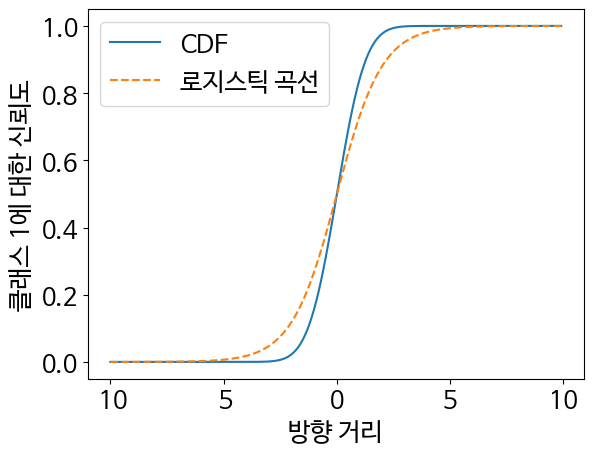

In [ ]:
from math import e
plt.plot(z, stats.norm.cdf(z), label='CDF')
plt.plot(z, 1 / (1 + e ** -z), label='로지스틱 곡선', linestyle='--')
plt.xlabel('방향 거리')
plt.ylabel('클래스 1에 대한 신뢰도')
plt.legend()
plt.show()

## 21-26

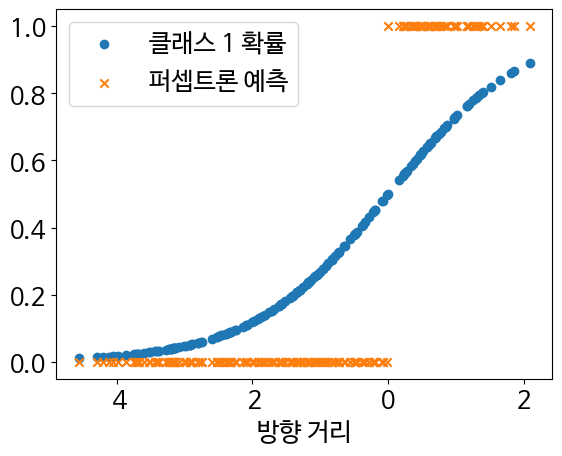

In [ ]:
M = np.column_stack([X_s, np.ones(X_s.shape[0])])
distances = M @ weights
likelihoods = 1 / (1 + e ** -distances)
plt.scatter(distances, likelihoods, label='클래스 1 확률')
plt.scatter(distances, distances > 0, label='퍼셉트론 예측', marker='x')
plt.xlabel('방향 거리')
plt.legend()
plt.show()

## 21-27

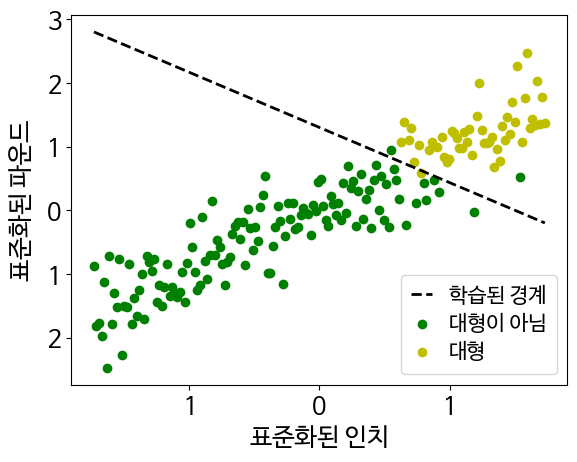

In [ ]:
np.random.seed(0)
def logistic_predict(v, weights): return 1 / (1 + e ** -(weights @ v))
def train_logistic(X, y): return train(X, y, predict=logistic_predict)
logistic_weights = train_logistic(X_s, y)[0]
plot_boundary(logistic_weights)

## 21-28

In [ ]:
np.random.seed(0)
poor_train_count = sum([train_logistic(X_s, y)[1][-1] < 0.97 for _ in range(5)])
print("기준 값인 0.97 이하인 f-측정치를 보인 경우는 "
     f"총 5회의 반복 학습 중 {poor_train_count}번 나타났습니다")

기준 값인 0.97 이하인 f-측정치를 보인 경우는 총 5회의 반복 학습 중 0번 나타났습니다


## 21-29

In [ ]:
np.random.seed(0)
random_fluctuations = np.random.normal(size=X.shape[0], scale=0.1)
waist = 0.45 * X[:,0] + random_fluctuations
X_w_waist = np.column_stack([X_s, (waist - waist.mean()) / waist.std()])
weights, f_measures = train_logistic(X_w_waist, y)

print("학습된 모델의 가중치는 다음과 같습니다")
print(np.round(weights, 2))
print(f'\nf-측정치는 {f_measures[-1]:.2f}와 같습니다')

학습된 모델의 가중치는 다음과 같습니다
[ 1.65  2.91  1.26 -4.08]

f-측정치는 0.97와 같습니다


## 21-30

In [ ]:
from sklearn.linear_model import LogisticRegression

## 21-31

In [ ]:
clf = LogisticRegression()

## 21-32

In [ ]:
clf.fit(X_s, y)

LogisticRegression()

## 21-33

계수는 [[2.22 3.22]]와 같습니다
편향은 [-3.95]와 같습니다


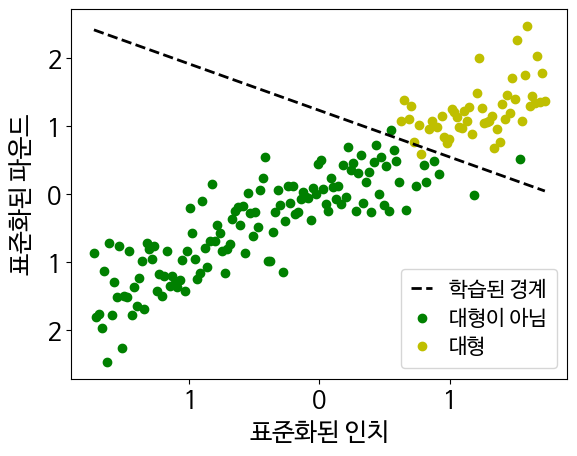

In [ ]:
coefficients = clf.coef_
bias = clf.intercept_
print(f"계수는 {np.round(coefficients, 2)}와 같습니다")
print(f"편향은 {np.round(bias, 2)}와 같습니다")
plot_boundary(np.hstack([clf.coef_[0], clf.intercept_]))

## 21-34

In [ ]:
new_data = np.array([[63, 110], [76, 199]])
predictions = clf.predict(standardize(new_data))
print(predictions)

[0 1]


## 21-35

In [ ]:
probabilities = clf.predict_proba(standardize(new_data))
print(probabilities)

[[9.99990426e-01 9.57354583e-06]
 [1.80723950e-03 9.98192760e-01]]


## 21-36

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

## 21-37

In [ ]:
X_transformed = standard_scaler.fit_transform(X)
assert np.allclose(X_transformed.mean(axis=0), 0)
assert np.allclose(X_transformed.std(axis=0), 1)
assert np.allclose(X_transformed, X_s)

## 21-38

In [ ]:
data_transformed = standard_scaler.transform(new_data)
assert np.array_equal(clf.predict(data_transformed), predictions)

## 21-39

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
num_classes = len(data.target_names)
num_features = len(data.feature_names)
print(f"와인 데이터셋에는 다음처럼 {num_classes} 개의 클래스가 포함되어 있습니다")
print(data.target_names)
print(f"\n그리고 다음 {num_features} 개의 특징으로 구성됩니다")
print(data.feature_names)

와인 데이터셋에는 다음처럼 3 개의 클래스가 포함되어 있습니다
['class_0' 'class_1' 'class_2']

그리고 다음 13 개의 특징으로 구성됩니다
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## 21-40

In [ ]:
X, y = load_wine(return_X_y=True)
clf.fit(standard_scaler.fit_transform(X), y)
biases = clf.intercept_

print(f"{biases.size} 개의 의사 결정 경계를 학습시켰습니다. "
     f"그리고 이들은 {num_classes} 개의 와인 유형에 해당합니다.\n")

for i, bias in enumerate(biases):
    label = data.target_names[i]
    print(f"{label}에 대한 의사 결정 경계의 편향은 {bias:0.2f} 입니다")

3 개의 의사 결정 경계를 학습시켰습니다. 그리고 이들은 3 개의 와인 유형에 해당합니다.

class_0에 대한 의사 결정 경계의 편향은 0.42 입니다
class_1에 대한 의사 결정 경계의 편향은 0.70 입니다
class_2에 대한 의사 결정 경계의 편향은 -1.12 입니다


## 21-41

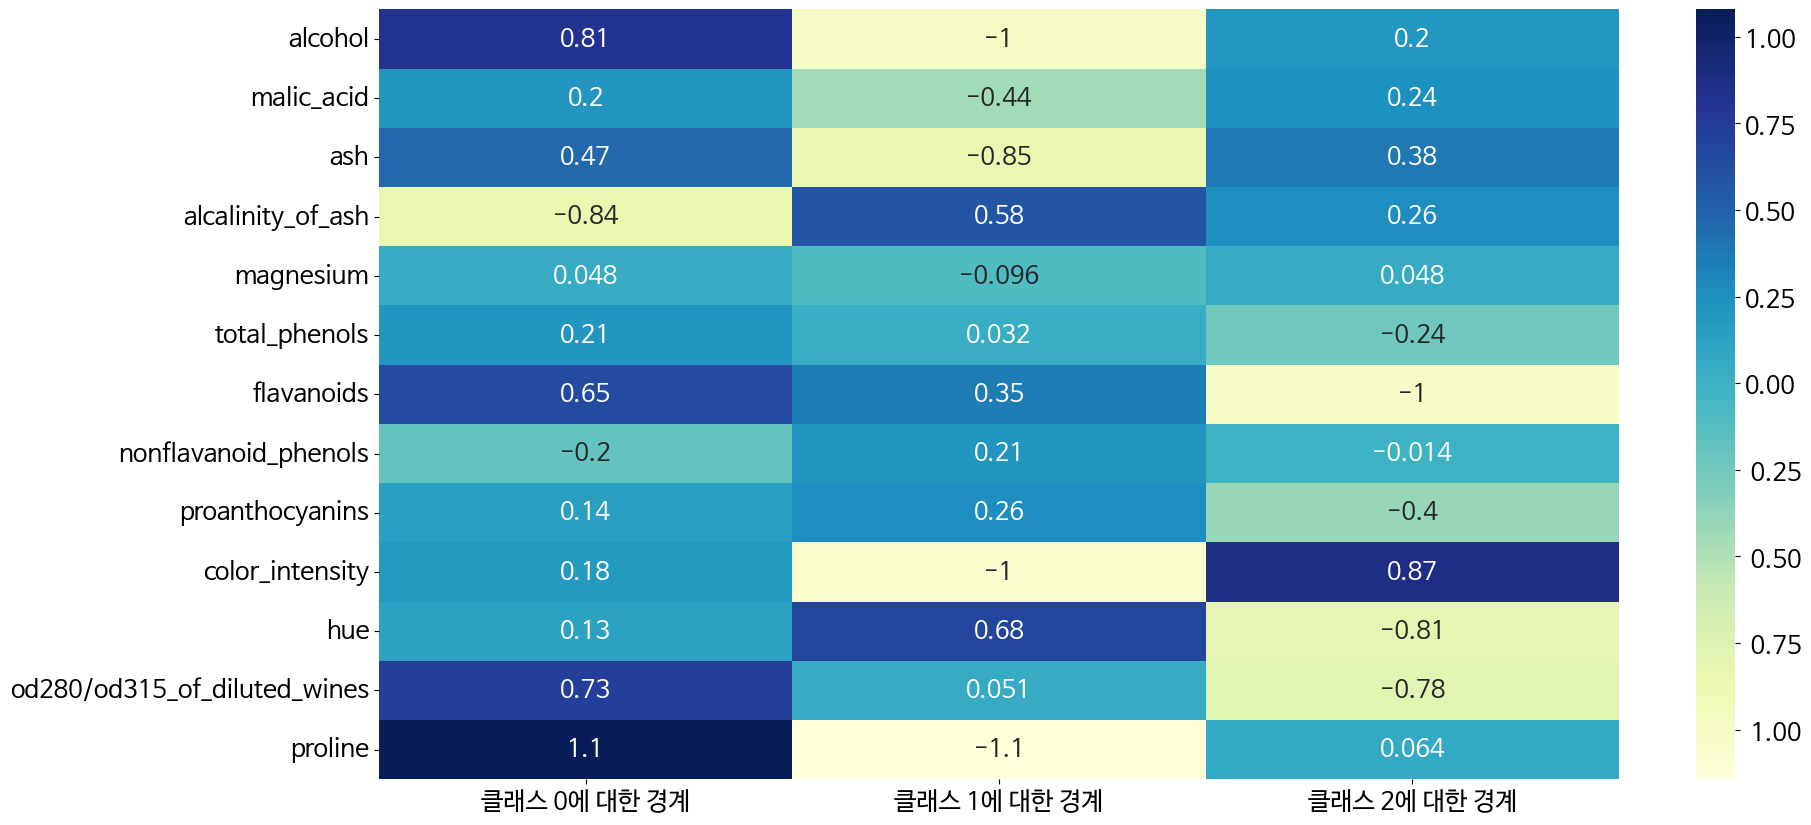

In [ ]:
import seaborn as sns
plt.figure(figsize = (20, 10))
coefficients = clf.coef_

sns.heatmap(coefficients.T, cmap='YlGnBu', annot=True,
            xticklabels=[f"클래스 {i}에 대한 경계" for i in range(3)],
            yticklabels=data.feature_names)
plt.yticks(rotation=0)
sns.set(font_scale=2)
plt.show()

## 21-42

In [ ]:
def rank_features(class_label):
    absolute_values = np.abs(clf.coef_[class_label])
    for i in np.argsort(absolute_values)[::-1]:
        name = data.feature_names[i]
        coef = clf.coef_[class_label][i]
        print(f"{name}: {coef:.2f}")

rank_features(0)

proline: 1.08
alcalinity_of_ash: -0.84
alcohol: 0.81
od280/od315_of_diluted_wines: 0.73
flavanoids: 0.65
ash: 0.47
total_phenols: 0.21
malic_acid: 0.20
nonflavanoid_phenols: -0.20
color_intensity: 0.18
proanthocyanins: 0.14
hue: 0.13
magnesium: 0.05


## 21-43

In [ ]:
rank_features(1)

proline: -1.14
color_intensity: -1.04
alcohol: -1.01
ash: -0.85
hue: 0.68
alcalinity_of_ash: 0.58
malic_acid: -0.44
flavanoids: 0.35
proanthocyanins: 0.26
nonflavanoid_phenols: 0.21
magnesium: -0.10
od280/od315_of_diluted_wines: 0.05
total_phenols: 0.03


## 21-44

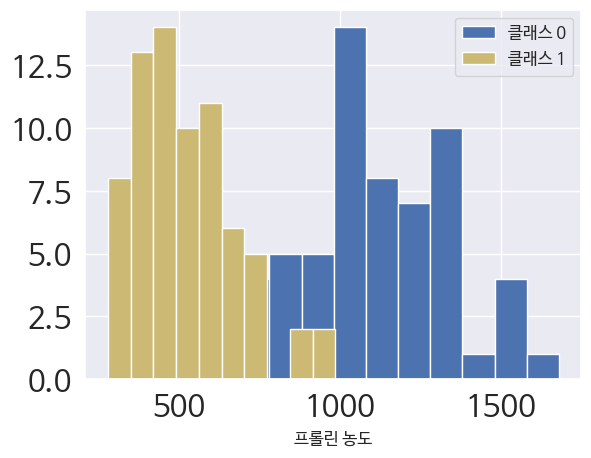

In [ ]:
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설정

index = data.feature_names.index('proline')
plt.hist(X[y == 0][:, index], label='클래스 0')
plt.hist(X[y == 1][:, index], label='클래스 1', color='y')
plt.xlabel('프롤린 농도', fontproperties=fm.FontProperties(fname=fe.fname))#, fontproperties=fe)
plt.legend(prop=fm.FontProperties(fname=fe.fname))
plt.show()

## 21-45

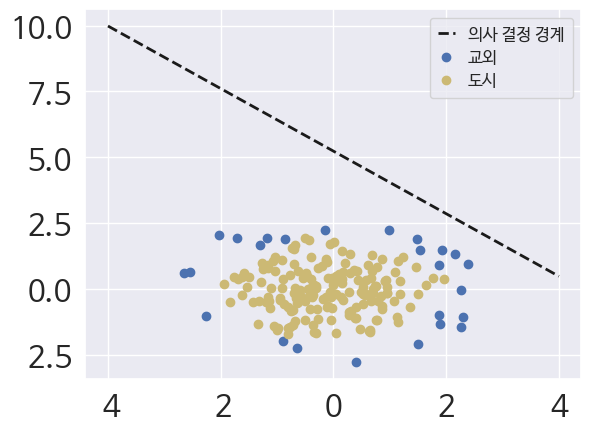

In [ ]:
np.random.seed(0)
X = np.array([[np.random.normal(), np.random.normal()] for _ in range(200)])
y = (np.linalg.norm(X, axis=1) < 2).astype(int)
clf = LogisticRegression()
clf.fit(X, y)
weights = np.hstack([clf.coef_[0], clf.intercept_])

a, b, c = weights
boundary = lambda x: -(a * x + c) / b
plt.plot(range(-4, 5), boundary(range(-4, 5)), color='k', linestyle='--',
                            linewidth=2, label='의사 결정 경계')
for i in [0, 1]:
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1],
             label= ['교외', '도시'][i],
             color=['b', 'y'][i])
plt.legend(loc='upper right',
           fontsize='medium',
           handlelength=1,
           borderpad=0.5,
           labelspacing=0.3)
plt.show()